In [130]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import re
from tabula import read_pdf
import csv

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

import requests
from bs4 import BeautifulSoup

plt.rcParams['figure.figsize'] = (15, 8)  # Width=15, Height=8

In [131]:
# Load University Admission datasets
unibuc_cti = pd.read_csv('./Admiteri CSV/UNIBUC_CTI_INFO_2024.csv')  # UNIBUC CTI+INFO
unibuc_mate = pd.read_csv('./Admiteri CSV/UNIBUC_MATE_2024.csv')  # UNIBUC MATE
snspa = pd.read_csv('./Admiteri CSV/SNSPA_2024.csv')  # SNSPA
psiho = pd.read_csv('./Admiteri CSV/PSIHOLOGIE_2024.csv')  # PSIHOLOGIE
jurnalism = pd.read_csv('./Admiteri CSV/JURNALISM_2024.csv')  # JURNALISM
drept = pd.read_csv('./Admiteri CSV/DREPT_clean_2024.csv')  # DREPT
arhitectura = pd.read_csv('./Admiteri CSV/ARHITECTURA_clean_2024.csv')  # ARHITECTURA
geografie = pd.read_csv('./Admiteri CSV/GEOGRAFIE_2024.csv')  # GEOGRAFIE
upb_acs = pd.read_csv('./Admiteri CSV/UPB_ACS_2014.csv')  # UPB ACS
umfcd = pd.read_csv('./Admiteri CSV/UMFCD_2019.csv')  # UMFCD

# ARHITECTURA_clean_2024.csv  GEOGRAFIE_2024.csv  PSIHOLOGIE_2024.csv  UMFCD_2019.csv            UNIBUC_MATE_2024.csv
# DREPT_clean_2024.csv        JURNALISM_2024.csv  SNSPA_2024.csv       UNIBUC_CTI_INFO_2024.csv  UPB_ACS_2014.csv

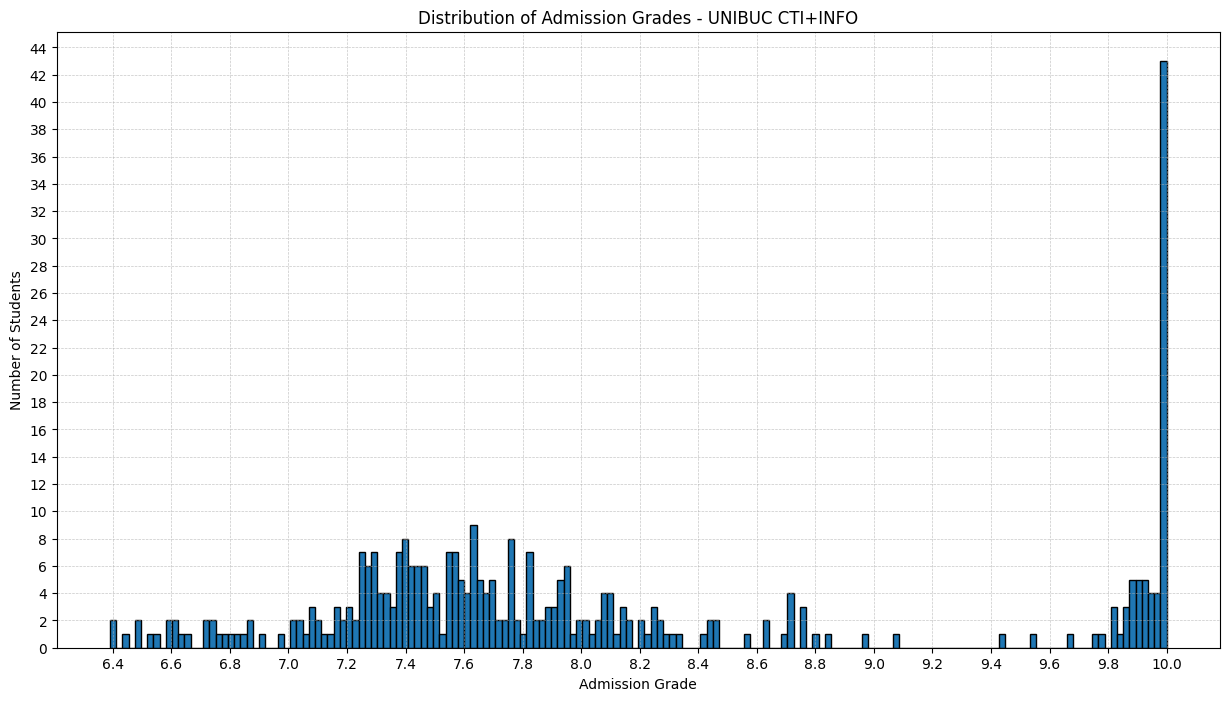

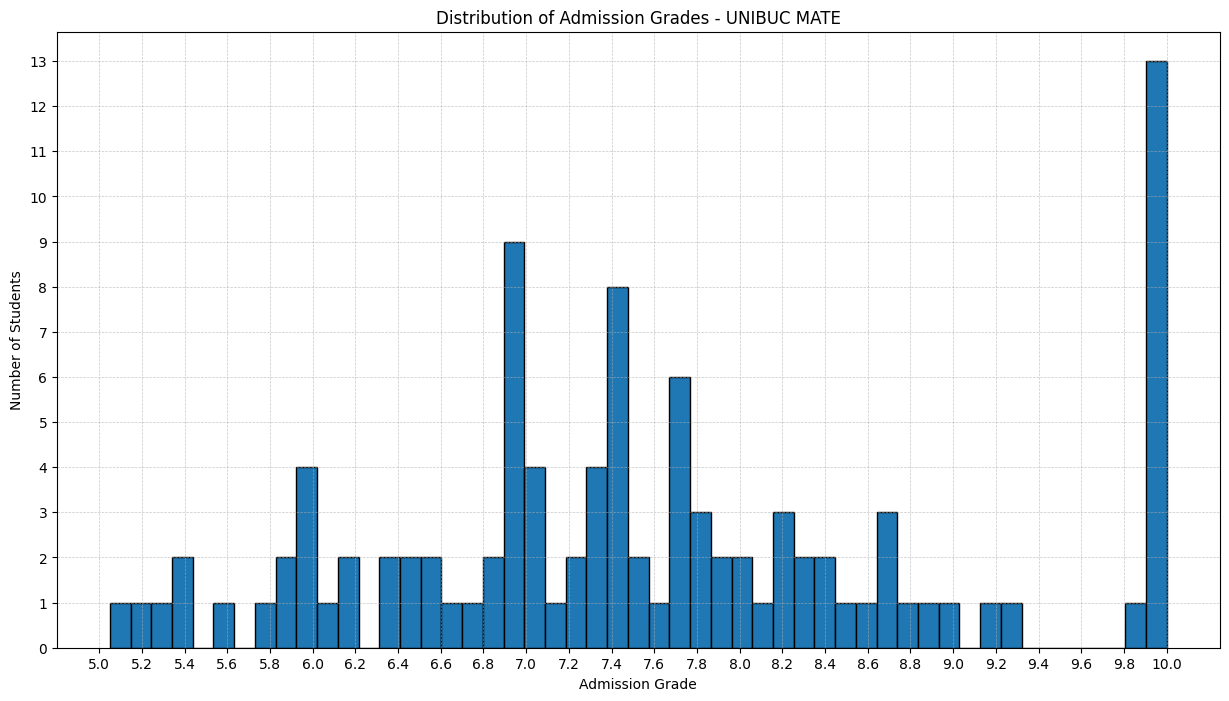

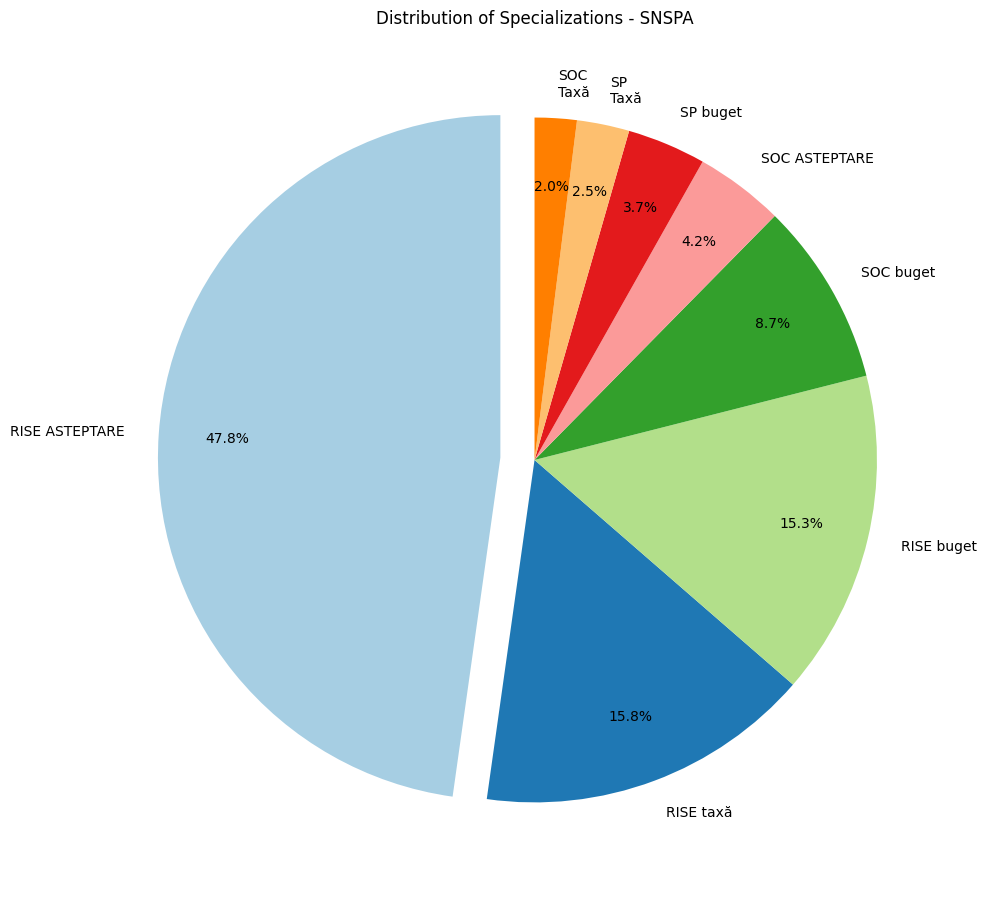

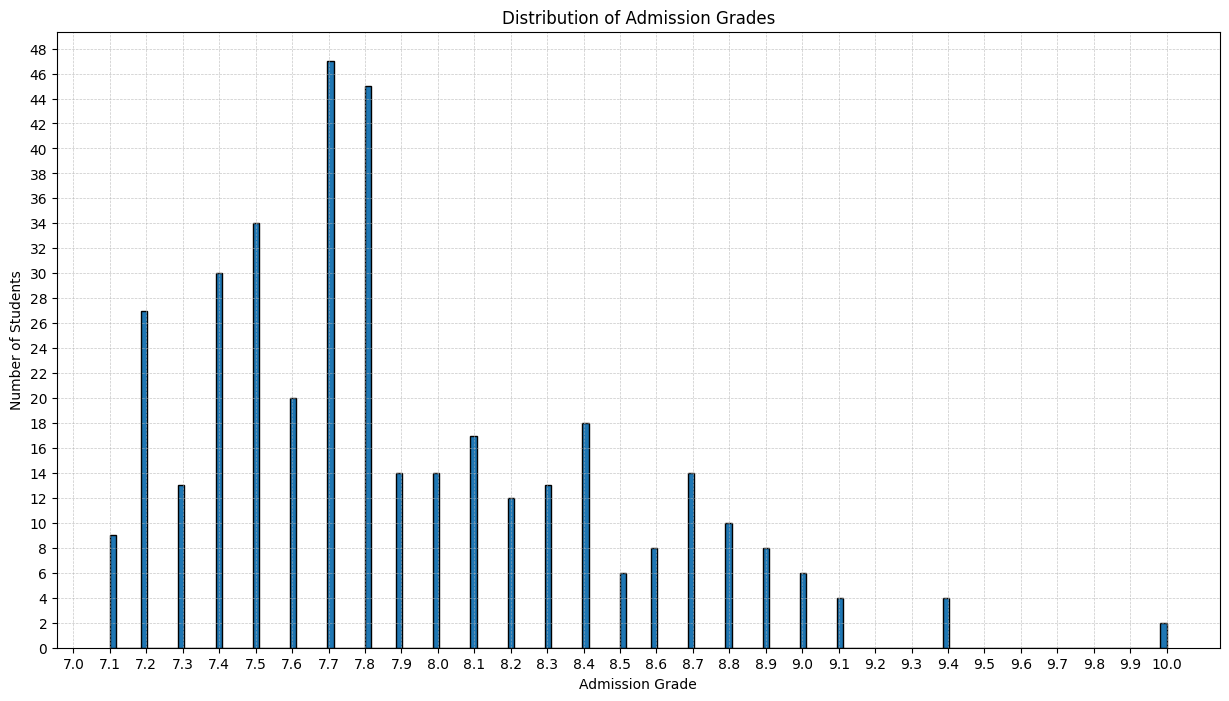

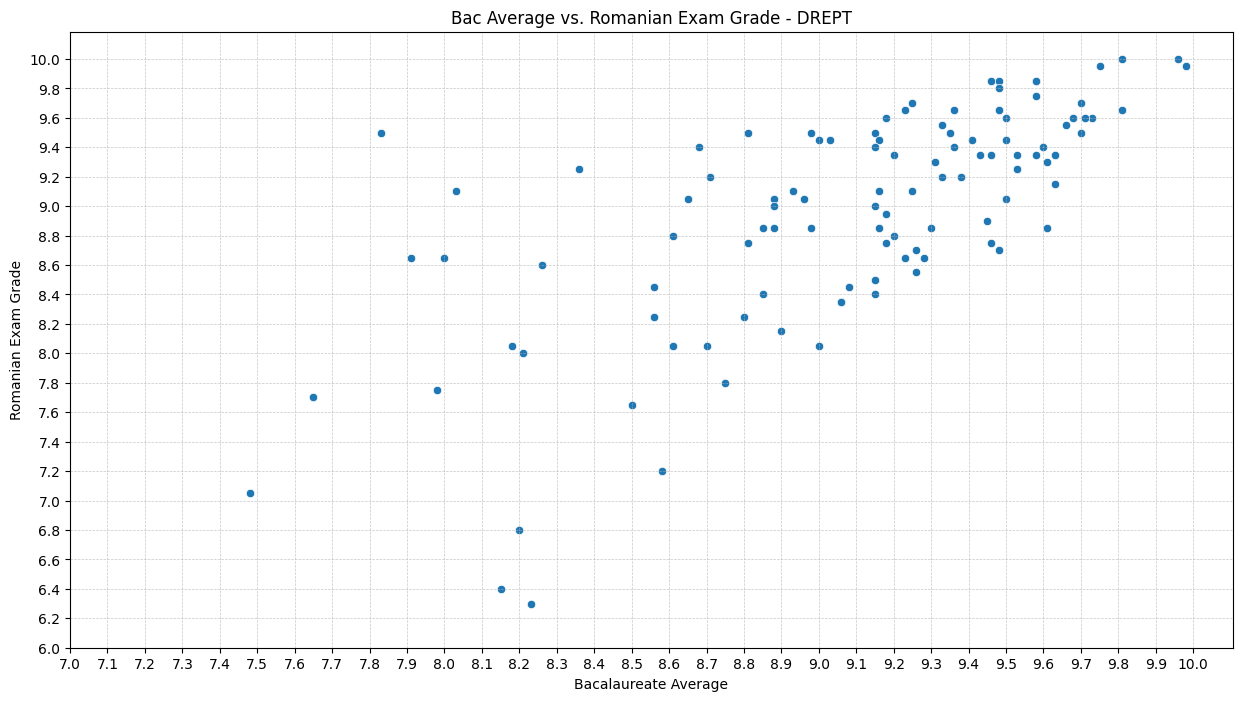

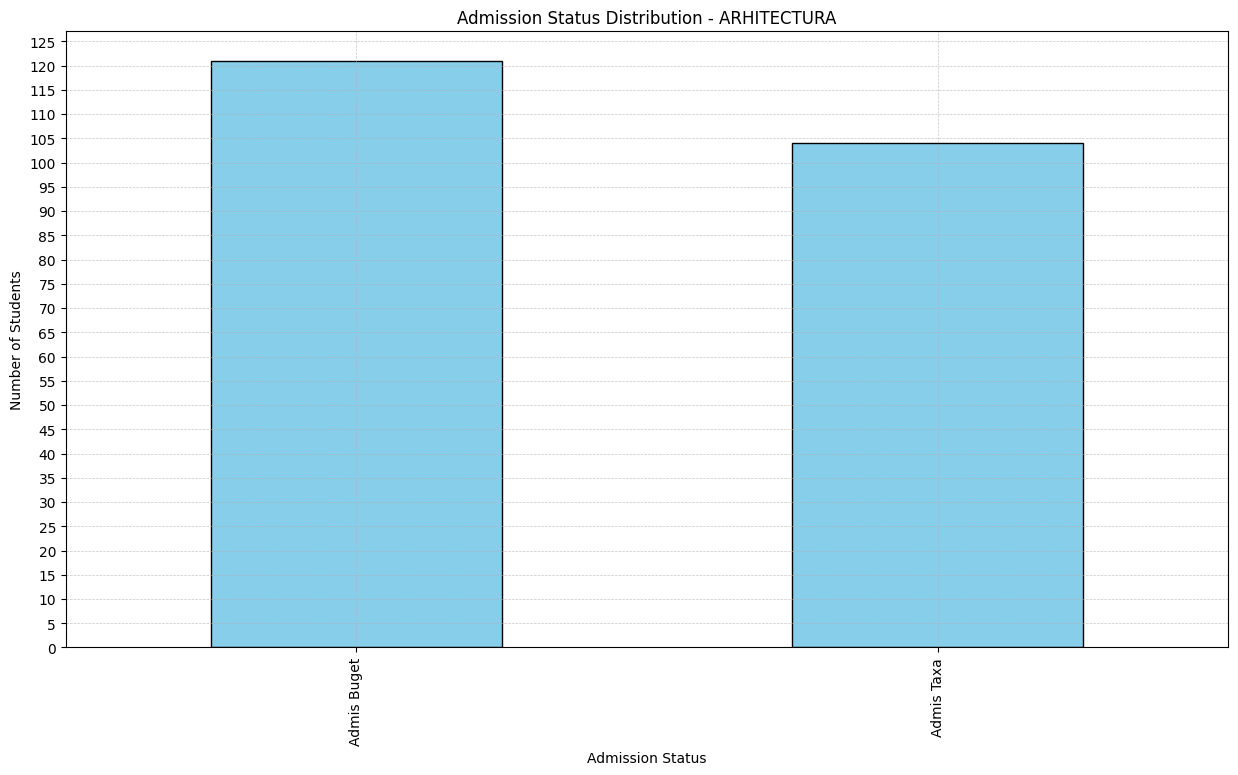

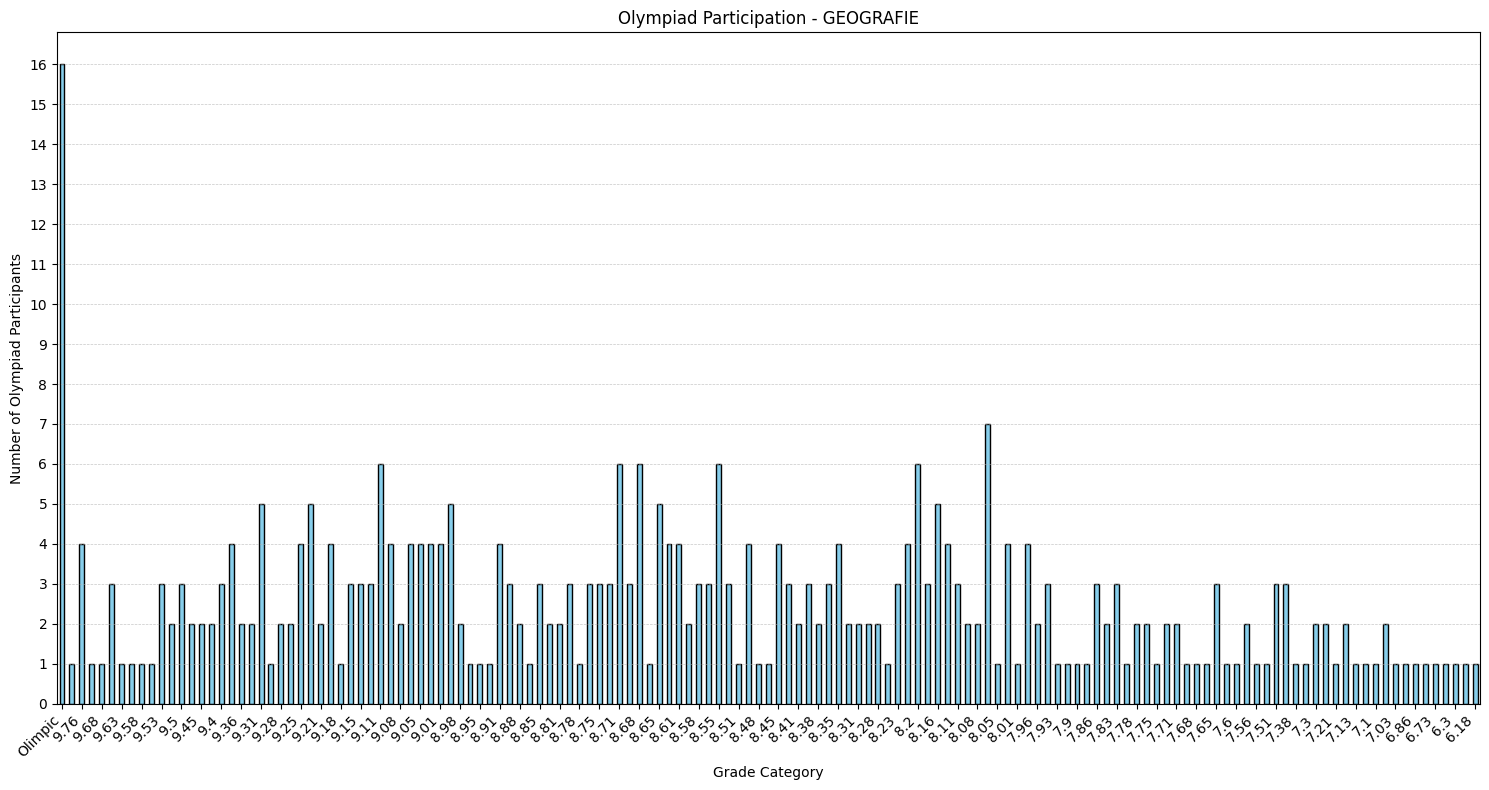

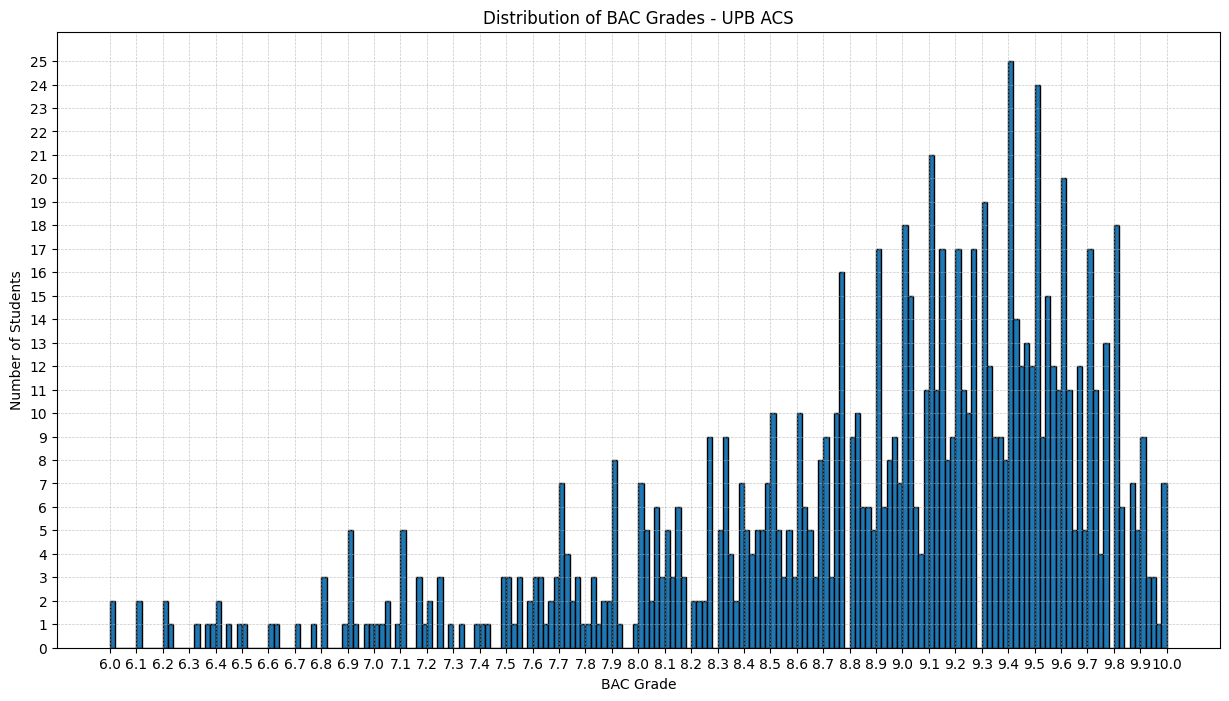

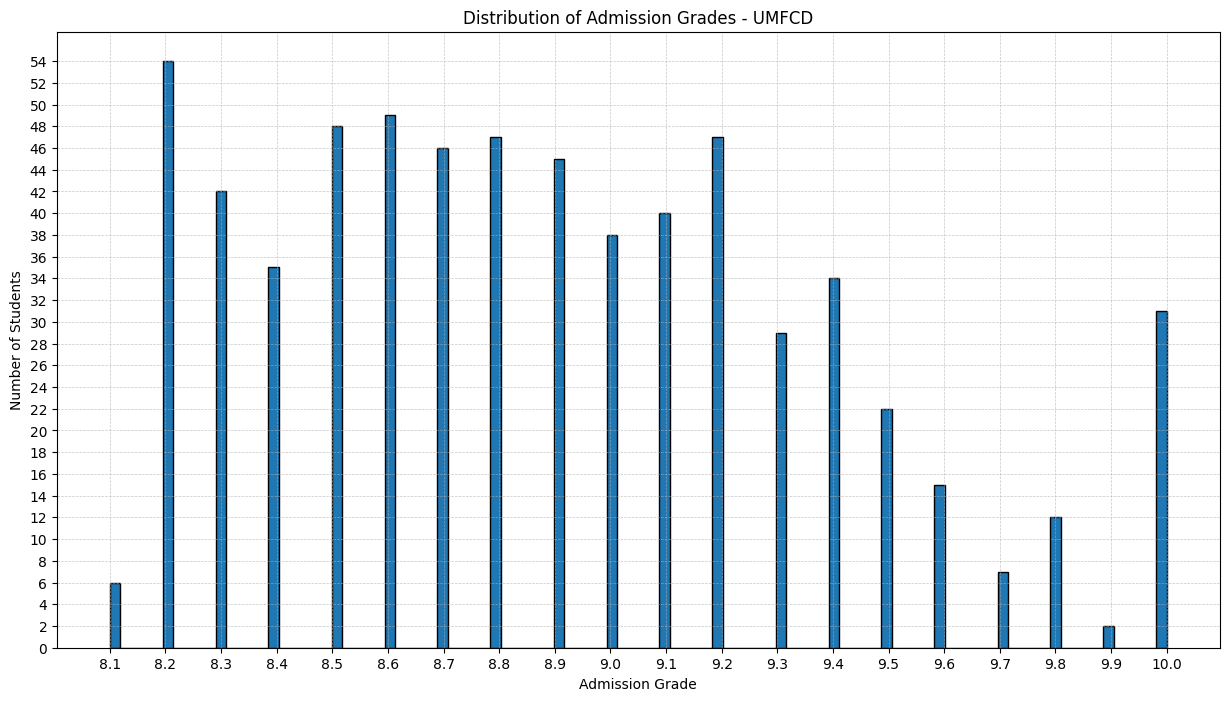

In [135]:
def advanced_histogram(data, column, bins=40, x_step=0.1, y_step=0.1, start_adjutsment = 0.00, xlabel='Admission Grade', ylabel='Number of Students', title='Distribution of Admission Grades'):
    plt.figure()
    counts, edges, _ = plt.hist(data[column], bins=bins, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Define x-axis ticks based on the step parameter
    min_grade = data[column].min() + start_adjutsment
    max_grade = data[column].max()
    plt.xticks(np.arange(min_grade, max_grade + x_step, x_step))

    # Define y-axis ticks based on the step parameter
    max_count = max(counts)
    plt.yticks(np.arange(0, max_count + y_step, y_step))
    
    # Add grid for better readability
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.show()

# 1. Histogram of Admission Grades for UNIBUC CTI+INFO
advanced_histogram(data = unibuc_cti, column = 'Medie', bins = 170, x_step = 0.2, y_step = 2, start_adjutsment = 0.01, title='Distribution of Admission Grades - UNIBUC CTI+INFO')

# 2. Histogram of Admission Grades for UNIBUC MATE
advanced_histogram(data = unibuc_mate, column = 'Medie', bins = 51, x_step = 0.2, y_step = 1, start_adjutsment = -0.05, title='Distribution of Admission Grades - UNIBUC MATE')

# 3. Pie Chart of Specializations in SNSPA
plt.figure(figsize=(10, 10))  # Increase the figure size to provide more space
specializations_counts = snspa['Specializare'].value_counts()

specializations_counts.index = specializations_counts.index.str.replace("SOC taxă", "SOC\nTaxă")
specializations_counts.index = specializations_counts.index.str.replace("SP taxă", "SP\nTaxă")

# Create the explode array
explode = [0.1] + [0] * (len(specializations_counts) - 1)

# Plot the pie chart with adjusted text positioning
specializations_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.80,  # Move the percentage labels closer to the center
    labeldistance=1.1,  # Move the labels further from the center
    colors=plt.cm.Paired.colors  # Optional: add distinct colors for better clarity
)

plt.ylabel('')  # Remove the default y-label
plt.title('Distribution of Specializations - SNSPA')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# 4. Histogram of Admission Grades in PSIHOLOGIE
histogram_admission_grades(data = psiho, column = 'Medie admitere', bins = 170, x_step = 0.1, y_step = 2, start_adjutsment = -0.10)

# 5. Scatter Plot - Medie BAC vs. Nota Română for DREPT
plt.figure()
x_column='Medie BAC'
y_column='Nota Română'
sns.scatterplot(x=x_column, y=y_column, data=drept)
plt.xlabel('Bacalaureate Average')
plt.ylabel('Romanian Exam Grade')
plt.title('Bac Average vs. Romanian Exam Grade - DREPT')

x_min = drept[x_column].min()
x_max = drept[x_column].max()
plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 0.1, 0.1))

y_min = drept[y_column].min()
y_max = drept[y_column].max()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 0.2, 0.2))

# Add a grid for better readability
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# 6. Bar Plot of Admission Status in ARHITECTURA
plt.figure()
ax = arhitectura['Status'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Admission Status')
plt.ylabel('Number of Students')
plt.title('Admission Status Distribution - ARHITECTURA')

# Adjust y-axis ticks with a step
y_max = arhitectura['Status'].value_counts().max()
y_step = 5  # Adjust this to your desired step
plt.yticks(np.arange(0, y_max + y_step, y_step))

plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# 7. Bar Plot of Olympiad Participants in GEOGRAFIE
plt.figure()
ax = geografie['Medie BAC'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Grade Category')
plt.ylabel('Number of Olympiad Participants')
plt.title('Olympiad Participation - GEOGRAFIE')

# Adjust x-axis ticks by selecting every nth label
x_labels = geografie['Medie BAC'].value_counts().sort_index(ascending=False).index
x_positions = np.arange(len(x_labels))

# Set the step for x-axis (e.g., show every 2nd label)
x_step = 2
plt.xticks(x_positions[::x_step], x_labels[::x_step], rotation=45, ha='right')

# Adjust y-axis ticks with a configurable step
y_step = 1
y_max = geografie['Medie BAC'].value_counts().max()
plt.yticks(np.arange(0, y_max + y_step, y_step))

plt.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

# 8. Histogram of BAC Grades for UPB ACS
advanced_histogram(data = upb_acs, column = 'BAC', bins = 200, x_step = 0.1, y_step = 1, start_adjutsment = 0, xlabel='BAC Grade', title='Distribution of BAC Grades - UPB ACS')

# 9. Histogram of Admission Grades for UMFCD
advanced_histogram(data = umfcd, column = 'Nota', bins = 100, x_step = 0.1, y_step = 2, start_adjutsment = 0, title='Distribution of Admission Grades - UMFCD')